# Introduction to matplotlib :

Right so now that you know how to arrange data like you want it to using pandas, and you also know how to perform complex operations on that data using numpy, that does seem to be more than enough right? 

But let us say you do use pandas and numpy to calculate and derive inferences from your data, how do you see or visualize the data that you have just created? This is exactly where matplotlib comes in.

Being the litteral crunchedup version of mathematical plotting library, matplot lib is the go to industry standard library to display your results in a visual format.

From genreating barcharts to visualizing clusters, matplot lib is a powerfull library that is used for data visualization.



*Though this document is not a complete and intensive guide to matplotlib, understand that that is the purpose. For minute and fine details, you can read the documentation. The purpose of this file is to simple expose you to the possibilities of this library and provide a breif overview of what all is possible using matplotlib*

###  **0. Importing matplotlib**
Just like any other library, to begin using matplotlib, you first need to import it.


In [1]:
import matplotlib as mplt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from math import log

Since we are working on a remote python notebook, we need not install the library on our local machine. 


However, the general method to do that is :

In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The most commonly used sublibrary of matplotlib is pyplot. So for convenience, we import pyplot as follows:

In [3]:
import matplotlib.pyplot as plt

### **1. Plotting Data**

Now lets try plotting some data.

For a start lets plot an empty graph

[]

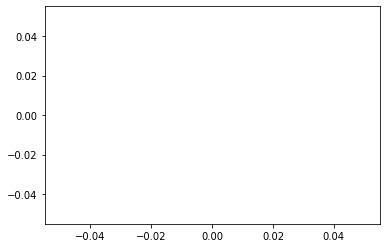

In [4]:
plt.plot()

Since we didn't pass any data into the function, nothing was plotted. 

Now lets try the sam thing with some data.

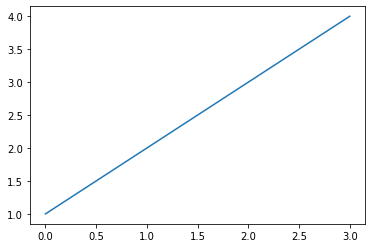

In [5]:
plt.plot([1, 2, 3, 4])

Without x and y coordinates provided separately, the function implicitly assumes that the data provided to it are the coordinates of the y axis while the presumed x axis coordinates are 0,1,2.....

Lets try this with some custom x and y coordinates

In [6]:
x = [1, 2, 3, 4]
y = [11, 44, 33, 22]

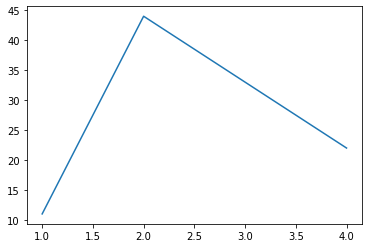

In [7]:
plt.plot(x, y)

Here, while x coordinates are in ascending order, y coordinates are not. 

Thus we can see that the plot function simply plots the coordinates and connects consecutive points with each other.

This can be seen more clearly below.

In [8]:
m = [10, 2, 3, 4]
n = [11, 44, 33, 22]

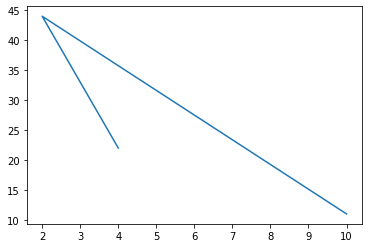

In [9]:
plt.plot(m,n)

A special feature of matplotlib is that it allows users to plot multiple graphsin a sinle plot, thus enabling us to locate cross-plot patters and correlations.

This is achieved through subplots.

An example is given below.:

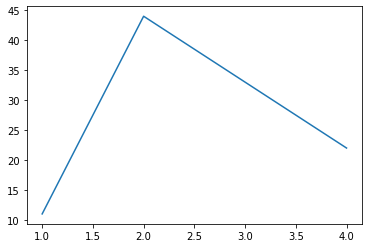

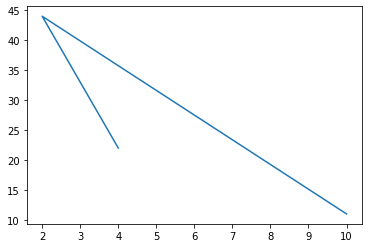

In [10]:
fig, ax = plt.subplots()
fig, bx = plt.subplots()
ax.plot(x, y)
bx.plot(m,n)

The locations of these subplots wrt one another can be manipluated by passing parameters to the subplots function.

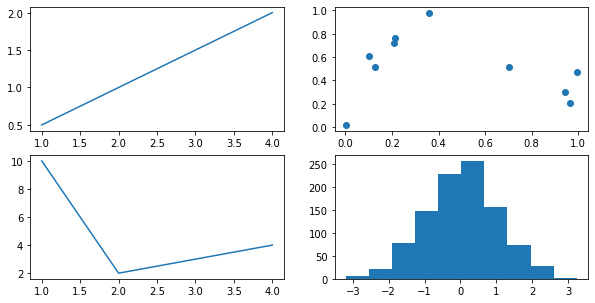

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
x=np.array(x)
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.plot(x, m);
ax4.hist(np.random.randn(1000));

### **2. Naming and saving plots**

Using matplotlib, graphs can be labled and saved as an image as follows:



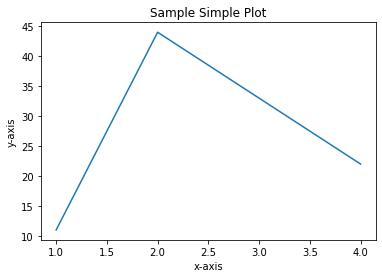

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")
fig.savefig("sample-plot.png")

### **3. General Matplotlib Plots :**



#### 3.1 Line :

Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [13]:
x = np.linspace(0, 10, 100)
# Calculate 100 evenly spaced numbers over the range of 0 to 10 both inclusive.
x=x[:16]
# Return the first 10

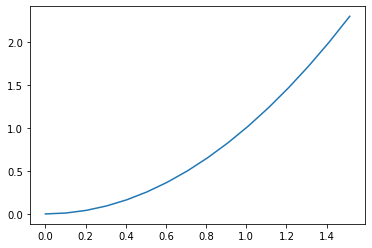

In [14]:
fig, ax = plt.subplots()

ax.plot(x, x**2)

#Try varying the values in the array x to see that the plotted graph is not smooth.

#### 3.2 Scatter :

A Scatter plot is simply a collection of points that have been plotted on the coordinate axis without connecting them with each other.

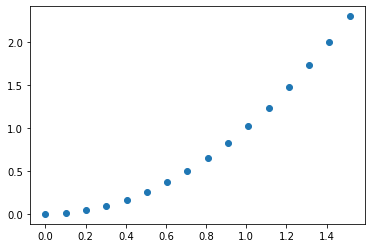

In [15]:
fig, ax = plt.subplots()
ax.scatter(x, x**2)

#### 3.3 Bar :

Can be of two types:
*   Vertical
*   Horizontal




[Text(0, 0.5, 'Price ($)'), Text(0.5, 1.0, "Dan's Nut Butter Store")]

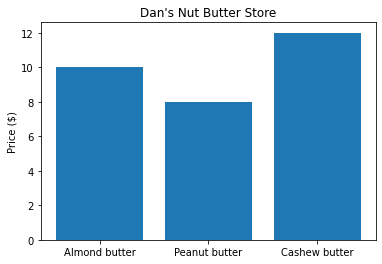

In [16]:
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)")

<BarContainer object of 3 artists>

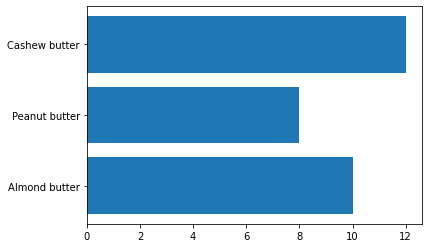

In [17]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

#### 3.4 Histogram :

Histograms are generally used for plotting data that is present in continuous ranges. This includes plots like price ranges vs items sold or probability distribution functions, probability density functions, cumulative distributive fucntions, normal/poisson/exponential distributions etc etc


(array([  5.,  17.,  78., 177., 264., 243., 139.,  62.,  14.,   1.]),
 array([-3.38181508, -2.68390675, -1.98599841, -1.28809008, -0.59018175,
         0.10772658,  0.80563491,  1.50354325,  2.20145158,  2.89935991,
         3.59726824]),
 <a list of 10 Patch objects>)

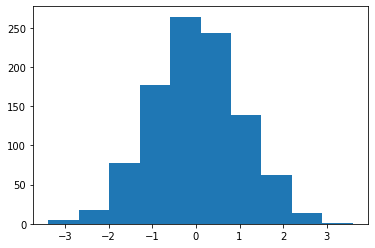

In [18]:
x = np.random.randn(1000) 
# pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x)

(array([ 95.,  84.,  93., 115.,  88.,  95.,  90., 114., 113., 113.]),
 array([0.00113856, 0.10102202, 0.20090547, 0.30078893, 0.40067238,
        0.50055584, 0.60043929, 0.70032275, 0.8002062 , 0.90008966,
        0.99997311]),
 <a list of 10 Patch objects>)

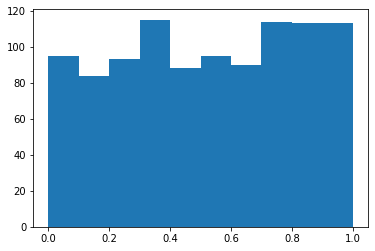

In [19]:
x = np.random.random(1000) 
# random data from random distribution

fig, ax = plt.subplots()
ax.hist(x)

Matplotlib can be used to show outputs of gradient descent by plotting scatter plot and lines on the same graph

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [20]:
#cost functiom

def f(x):
    return x**2 + x + 1

In [21]:
#derivative of cost function

def df(x):
    return 2*x + 1

In [22]:
x_1 = np.linspace(start=-3, stop=3, num=500)

# Plotting 2 graphs side by side

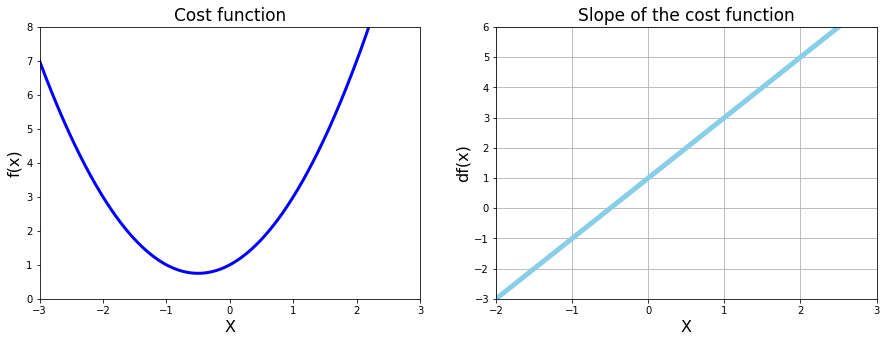

In [23]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## The goal of gradient descent is to minimize this cost function i.e to attain slope = 0 which we will learn in later classes

In [24]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


## We can show the cost minimization easily with matplotlib by using .plot and .scatter function together side by side

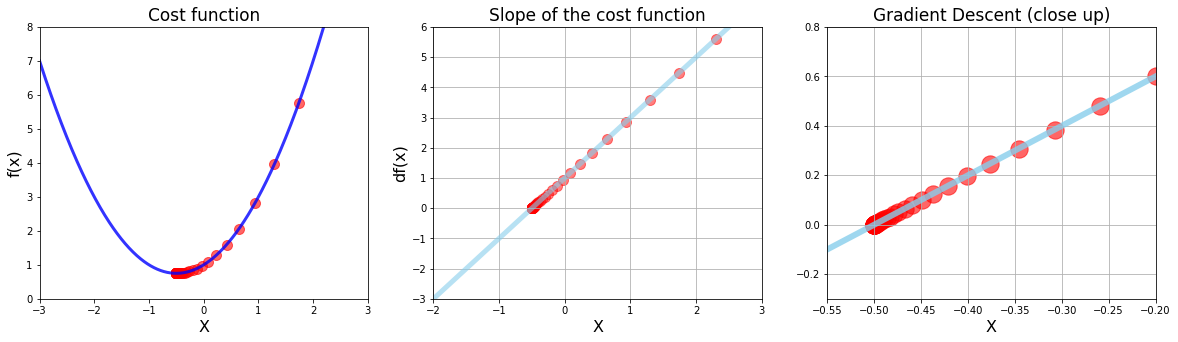

In [25]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

## We can also plot 3d charts using matplotlib which are required for gradient descent with 2 variables

## 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [26]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [27]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


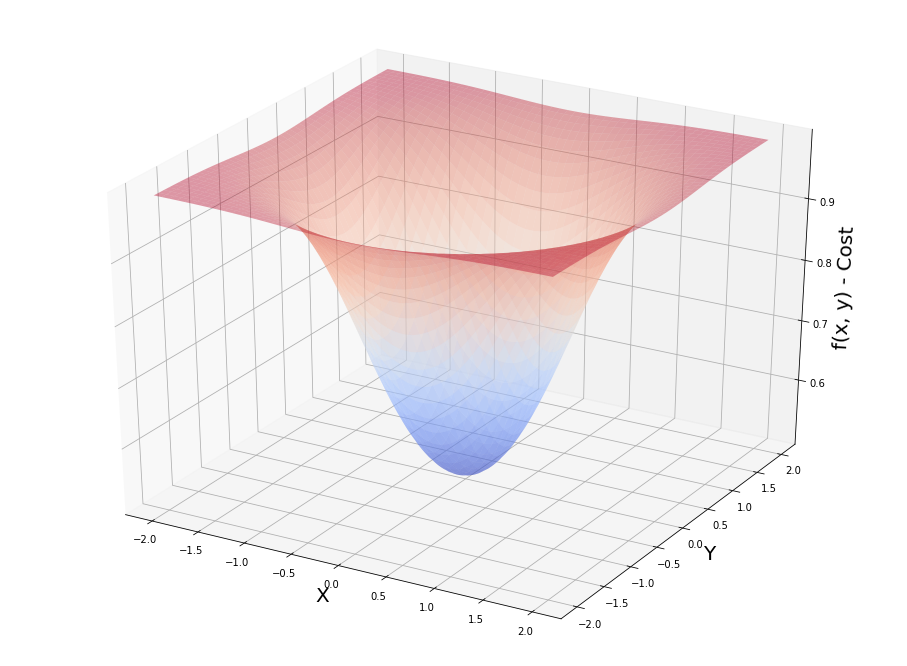

In [28]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

## the above chart shows how cost of the above given function will vary wrt x and y

In [29]:
# Partial derivative functions of above ex
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [30]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


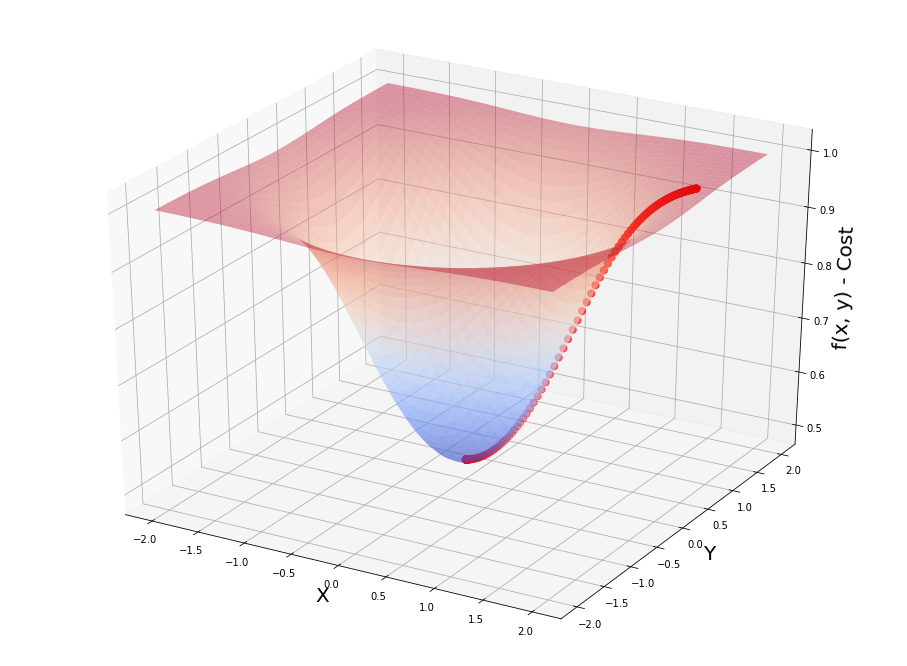

In [31]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## minimization of cost function with 2 variables shown in 3d plot